# Defining a function with returns setof option

* PostgreSQL functions allow you to encapsulate reusable logic within the database. 
* To return one or more rows from a function, you can use the `returns setof` option.
* The `returns setof` option allows you to return one or more rows with a predefined structure from a function.

Here’s the syntax for creating a function that returns a set of rows:

```postgresql
create or replace function function_name(parameters)
returns setof row_structure
as
$$
   -- logic
   -- ...
   -- return one or more rows
   return query select_query;
$$ language plpgsql;
```

* First, specify the function name after the `create or replace function` keywords.
* Second, use the `returns setof` with a predefined row structure. The row structure can be a composite type defined in the database.
* Third, return rows inside the function body using the `return query` statement followed by a select statement.

# Calling the function

**To call a function with the `returns setof`, you use the following statement:**

```postgresql
SELECT function_name(argument); 
```

It’ll return a single column containing an array of all columns of the returned rows.

**To retrieve data from a specific column of the return rows, you specify the dot (`.`) and column name after the function call:**

```postgresql
SELECT (function_name(argument)).column_name; 
```

**If you want to retrieve data from all columns of the returned rows, you can use the `.*` like this:**

```postgresql
SELECT (function_name(argument)).*; 
```

**Alternatively, you can call the function using the `SELECT...FROM` statement:**

```postgresql
SELECT * FROM function_name(argument); 
```


# PL/pgSQL Returns SetOf example

We’ll use the `film` table from the sample database for the demonstration.

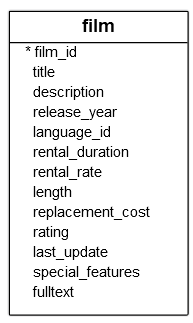

**First, define a function that retrieves a film by its id from the `film` table:**

```postgresql
create or replace function find_film_by_id(
	p_id int
)
returns setof film
as
$$
begin
   return query select * from film
   where film_id = p_id;
end;
$$
language plpgsql; 
```

**Second, call the `find_film_by_id()` function:**

```postgresql
SELECT find_film_by_id(100); 
```

Output:

```
find_film_by_id

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 (100,"Brooklyn Desert","A Beautiful Drama of a Dentist And a Composer who must Battle a Sumo Wrestler in The First Manned Space Station",2006,1,7,4.99,161,21.99,R,"2013-05-26 14:50:58.951",{Commentaries},"'battl':14 'beauti':4 'brooklyn':1 'compos':11 'dentist':8 'desert':2 'drama':5 'first':20 'man':21 'must':13 'space':22 'station':23 'sumo':16 'wrestler':17")
(1 row)
```

The output is an array that contains column data.

**Third, retrieve the title of the film with id 100:**

```postgresql
select (find_film_by_id(100)).title; 
```

Output:

```
title
-----------------
 Brooklyn Desert
(1 row)
```

**Fourth, retrieve the data from all columns of the returned row:**

```postgresql
SELECT * FROM find_film_by_id(100); 
```

Output:

```
-[ RECORD 1 ]----+--------------------------------------------------------------------------------------------------------------------------------------------------------------
film_id          | 100
title            | Brooklyn Desert
description      | A Beautiful Drama of a Dentist And a Composer who must Battle a Sumo Wrestler in The First Manned Space Station
release_year     | 2006
language_id      | 1
rental_duration  | 7
rental_rate      | 4.99
length           | 161
replacement_cost | 21.99
rating           | R
last_update      | 2013-05-26 14:50:58.951
special_features | {Commentaries}
fulltext         | 'battl':14 'beauti':4 'brooklyn':1 'compos':11 'dentist':8 'desert':2 'drama':5 'first':20 'man':21 'must':13 'space':22 'station':23 'sumo':16 'wrestler':17
```

**Note that we use `\x` command in psql to display the result set vertically.**